<a href="https://colab.research.google.com/github/St-Jester/AutoMLHW1/blob/master/HW1_ZabavaKV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


In [0]:
X, y = load_diabetes(return_X_y = True)

In [3]:
reg = RandomForestRegressor()
reg.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [46]:
X[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [0]:
# hyperparameters: max_depth, n_estimators, max_features.

In [0]:

#try different methods to find the bet that minimizes L(params)
def L(hyperparam_arr):  
    print(hyperparam_arr) 
    reg = RandomForestRegressor(max_depth = int(hyperparam_arr[0][0]), n_estimators = int(hyperparam_arr[0][1]),max_features = int(hyperparam_arr[0][2]) )
    reg.fit(X,y)
    score = cross_val_score(reg, X,y, scoring='neg_mean_squared_error').mean()
    score = np.array(score)
    return score

In [0]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

In [67]:
param_dist = {'max_depth': np.append(np.arange(start = 10,stop = 110,step=20),None),
              'n_estimators': np.arange(start = 80,stop = 160,step=5), 
              'max_features':np.arange(start = 0,stop = 10,step=1)}
rs = RandomizedSearchCV(reg, param_distributions=param_dist, scoring='neg_mean_squared_error', n_iter=25)
rs.fit(X,y)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                           

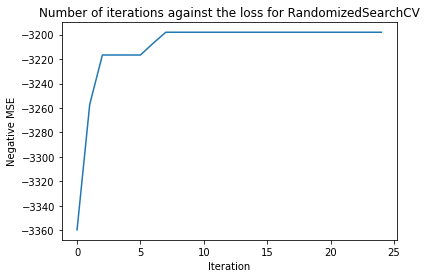

In [68]:

y_rs = np.maximum.accumulate(rs.cv_results_['mean_test_score'])

plt.plot(y_rs, label = 'RandomizedSearchCV')
plt.xlabel('Iteration')
plt.ylabel('Negative MSE')
plt.title('Number of iterations against the loss for RandomizedSearchCV')
plt.show()

In [77]:
param_dist = {'max_depth': np.arange(start = 10,stop = 110,step=20),
              'n_estimators': np.arange(start = 80,stop = 160,step=20), 
              'max_features':np.arange(start = 1,stop = 10,step=1)}
gs = GridSearchCV(reg, param_grid=param_dist, scoring='neg_mean_squared_error')
gs.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [78]:
gs.cv_results_['mean_test_score']

array([-3275.32384269, -3231.88080401, -3258.13648555, -3285.80702444,
       -3300.56146862, -3247.65975402, -3175.96097   , -3226.85310517,
       -3203.35917792, -3243.07747225, -3235.42872017, -3200.65331241,
       -3236.91526794, -3290.62625393, -3269.87915446, -3200.90137475,
       -3255.47095791, -3308.28437032, -3265.18815554, -3290.63434579,
       -3214.08474525, -3303.74319705, -3282.91542414, -3270.65380006,
       -3296.516563  , -3367.73159765, -3315.79446219, -3264.10257081,
       -3372.72118445, -3308.22039856, -3285.41268603, -3366.51986282,
       -3320.44155864, -3406.23272266, -3331.85311546, -3323.1555401 ,
       -3290.78412344, -3332.18940106, -3294.17220979, -3293.90878267,
       -3194.43382587, -3231.80033407, -3225.68534848, -3200.1490842 ,
       -3198.36419751, -3286.26152202, -3242.30972813, -3243.44337901,
       -3223.50700712, -3218.93178254, -3229.8312382 , -3240.44190923,
       -3352.31504193, -3294.39588681, -3304.90643535, -3287.71218422,
      

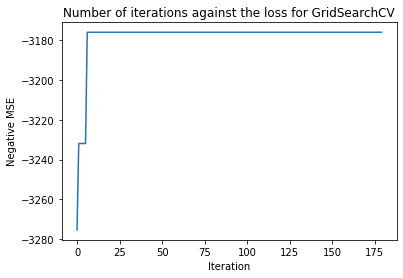

In [79]:

y_gs = np.maximum.accumulate(gs.cv_results_['mean_test_score'])

plt.plot(y_gs, label = 'GridSearchCV')
plt.xlabel('Iteration')
plt.ylabel('Negative MSE')
plt.title('Number of iterations against the loss for GridSearchCV')
plt.show()

In [11]:
!pip install GPy
!pip install GPyOpt

     |████████████████████████████████| 1.0MB 2.7MB/s 
     |████████████████████████████████| 71kB 7.1MB/s 
  Created wheel for GPy: filename=GPy-1.9.9-cp36-cp36m-linux_x86_64.whl size=2633909 sha256=974fd55f2952897820769b5880da74093c80a22e9d045559f6e0040754817b88
  Stored in directory: /root/.cache/pip/wheels/5d/36/66/2b58860c84c9f2b51615da66bfd6feeddbc4e04d887ff96dfa
  Created wheel for paramz: filename=paramz-0.9.5-cp36-none-any.whl size=102552 sha256=f55a0827bfe9f84511ce45655366e31d588155d321bb5070ba14cfd29c985cc4
  Stored in directory: /root/.cache/pip/wheels/c8/4a/0e/6e0dc85541825f991c431619e25b870d4b812c911214690cf8
Successfully built GPy paramz
     |████████████████████████████████| 61kB 1.9MB/s 
  Created wheel for GPyOpt: filename=GPyOpt-1.2.6-cp36-none-any.whl size=83623 sha256=3d829c6eee5adc5b135ed80cd798ecbb012b6f507dfb07f90d825106aea03da2
  Stored in directory: /root/.cache/pip/wheels/b2/00/69/cfa967a125cf25e66f644be6193ad6f0edf231147879ad714f
Successfully built GPyOpt


In [52]:
 np.append(np.arange(start = 10,stop = 110,step=20),None),
 

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

In [61]:

# Bayesian Optimization
import GPy
import GPyOpt
from GPyOpt.methods import BayesianOptimization

bds = [{'name':'max_depth', 'type':'discrete', 'domain':(tuple(np.arange(start = 10,stop = 110,step=20)))},
       {'name':'n_estimators', 'type':'discrete', 'domain':(tuple(np.arange(start = 80,stop = 160,step=5)))},
       {'name':'max_features', 'type':'discrete', 'domain':(tuple(np.arange(start = 0,stop = 11,step=1)))}]

optimizer = BayesianOptimization(f=L, model_type='GP', acquisition_type='EI', domain=bds, maximize=True)
optimizer.run_optimization(max_iter=20)

[[30. 80. 10.]]
[[ 30. 155.  10.]]
[[10. 80.  1.]]
[[70. 80. 10.]]
[[ 10. 150.   8.]]
[[10 80  1]]
[[10 80  1]]


In [0]:
optimizer.plot_acquisition()

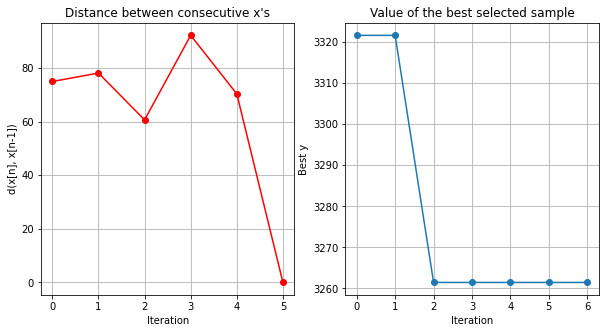

In [64]:
optimizer.plot_convergence()

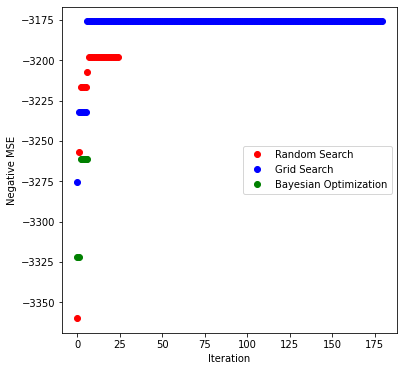

In [80]:
y_rs = np.maximum.accumulate(rs.cv_results_['mean_test_score'])
y_gs = np.maximum.accumulate(gs.cv_results_['mean_test_score'])
y_bo = np.maximum.accumulate(-optimizer.Y).ravel()

plt.figure(figsize=(6,6))
plt.plot(y_rs, 'ro', label='Random Search')
plt.plot(y_gs, 'bo', label='Grid Search')
plt.plot(y_bo, 'go', label='Bayesian Optimization')
plt.xlabel('Iteration')
plt.ylabel('Negative MSE')
plt.legend(loc='right');